In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('../data/hotel_bookings_cleaned.csv')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)


In [5]:
df['hotel'].value_counts()

hotel
0    79330
1    40060
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_17924\168231258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hotel', palette='deep')


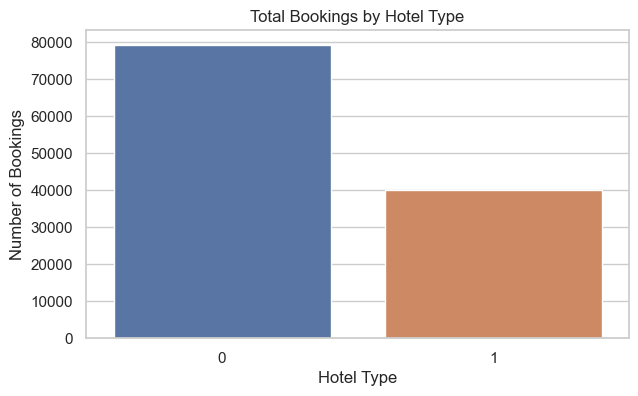

In [6]:
hotel_counts = df['hotel'].value_counts()

sns.countplot(data=df, x='hotel', palette='deep')
plt.title('Total Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

In [7]:
df['lead_time'].mean()

np.float64(104.01141636652986)

Average Lead Time: 104.01 days


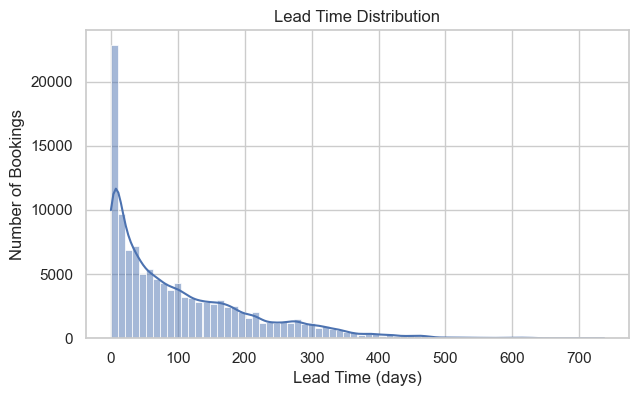

In [14]:
avg_leadtime = df['lead_time'].mean()
print(f"Average Lead Time: {avg_leadtime:.2f} days")

sns.histplot(df['lead_time'], bins=70, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.show()

In [15]:
df['is_canceled'].mean()

np.float64(0.37041628277075134)

Cancellation Rate: 37.04%


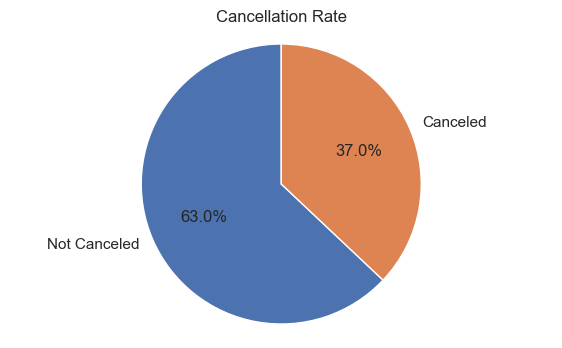

In [20]:
cancel_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

cancel_counts = df['is_canceled'].value_counts().rename({0: 'Not Canceled', 1: 'Canceled'})

plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Cancellation Rate")
plt.axis('equal')
plt.show()

In [26]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [27]:
df['arrival_date'].dt.to_period('M').astype(str)

0         2015-07
1         2015-07
2         2015-07
3         2015-07
4         2015-07
           ...   
119385    2017-08
119386    2017-08
119387    2017-08
119388    2017-08
119389    2017-08
Name: arrival_date, Length: 119390, dtype: object

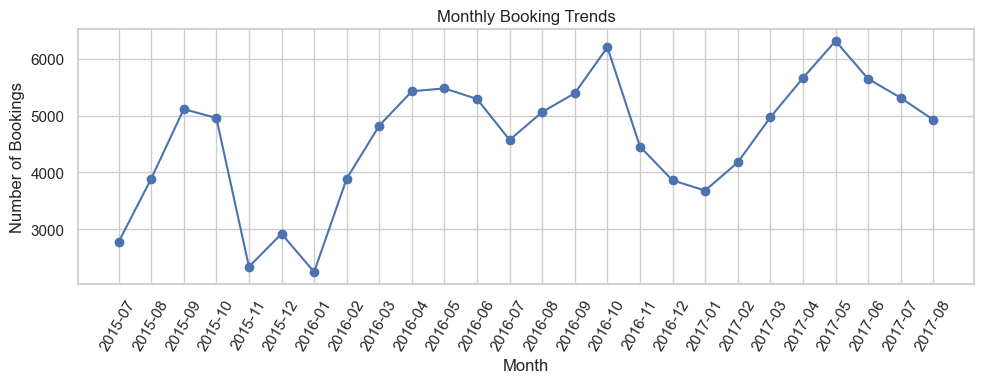

In [32]:
df['arrival_month'] = df['arrival_date'].dt.to_period('M').astype(str)

monthly_bookings = df.groupby('arrival_month').size().reset_index(name='bookings')
monthly_bookings = monthly_bookings.sort_values('arrival_month')
plt.figure(figsize=(10,4))
plt.plot(monthly_bookings['arrival_month'], monthly_bookings['bookings'], marker='o')
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Booking Trends')
plt.grid(True)
plt.tight_layout()
plt.show()
